Task 3

1. Problem stetment

Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.
In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark on

the journey of sales prediction using machine learning in Python.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


In [10]:
# Load the dataset
data = pd.read_csv(r"E:\Project of DS\Codsoft project\sales prediction\advertising.csv")


In [12]:
# Show the first few rows of the dataset
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


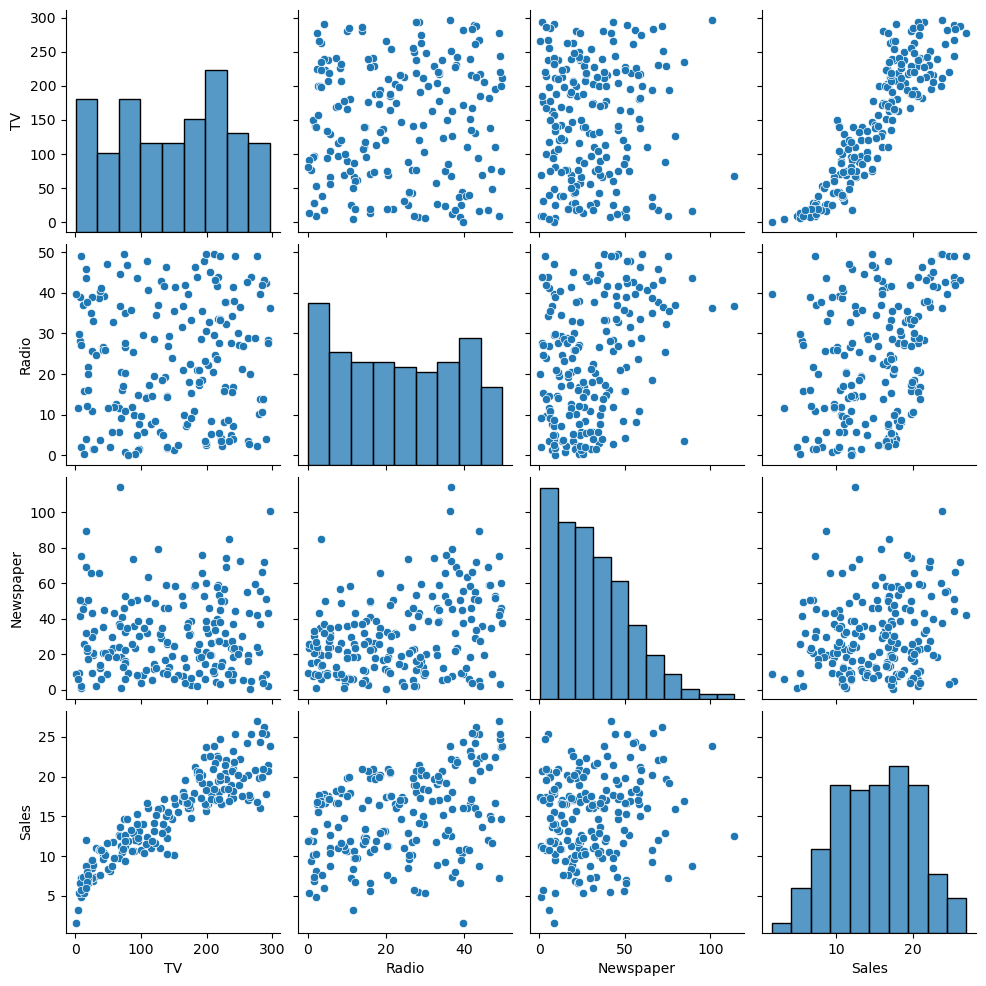

In [14]:
# Visualize pairwise relationships between features and target
sns.pairplot(data)
plt.show()


                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


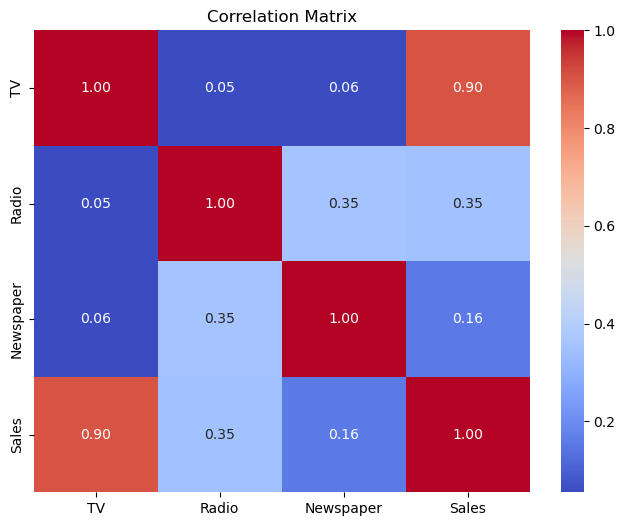

In [16]:
# Correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


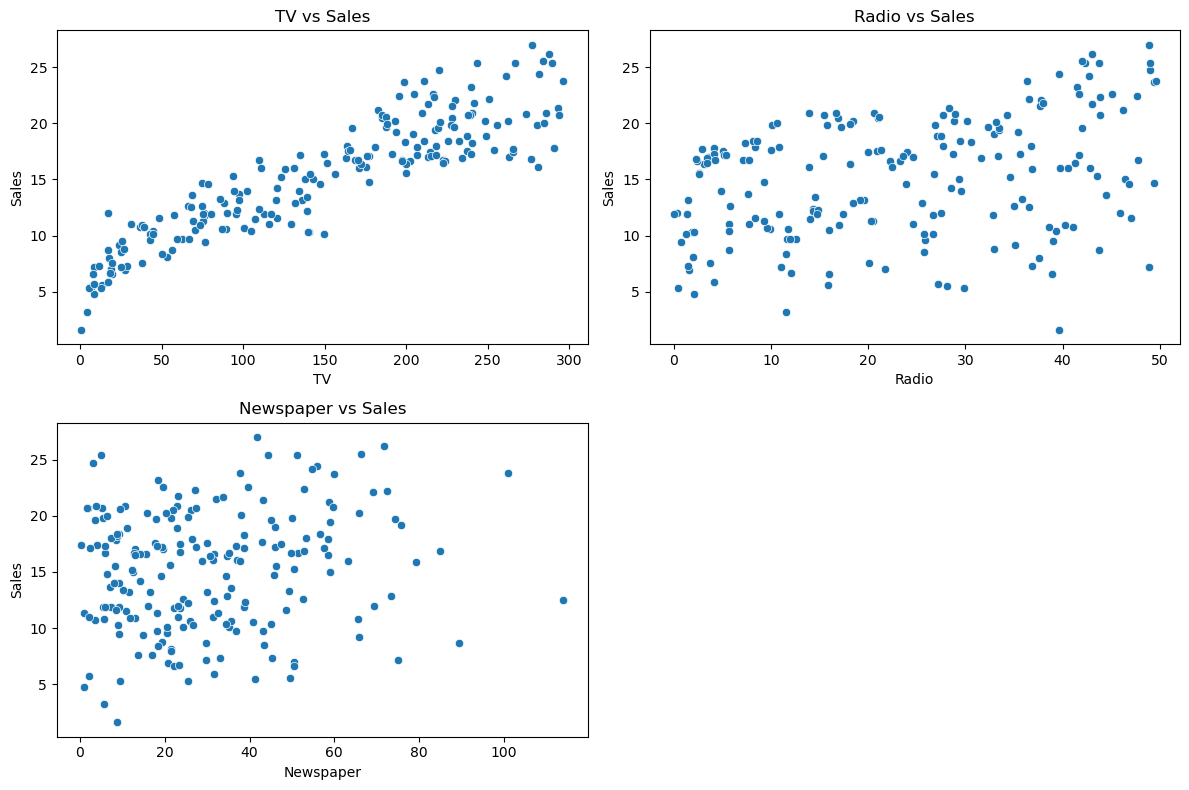

In [18]:
# Scatter plots of features vs target variable Sales
plt.figure(figsize=(12, 8))

# TV vs Sales
plt.subplot(2, 2, 1)
sns.scatterplot(x=data['TV'], y=data['Sales'])
plt.title('TV vs Sales')

# Radio vs Sales
plt.subplot(2, 2, 2)
sns.scatterplot(x=data['Radio'], y=data['Sales'])
plt.title('Radio vs Sales')

# Newspaper vs Sales
plt.subplot(2, 2, 3)
sns.scatterplot(x=data['Newspaper'], y=data['Sales'])
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()


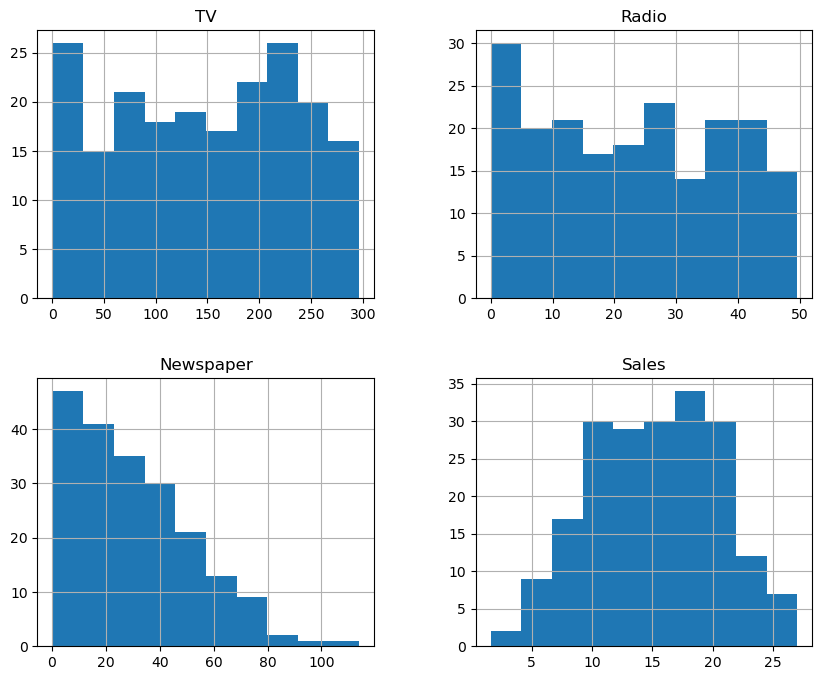

In [20]:
# Visualize distribution of features
data[['TV', 'Radio', 'Newspaper', 'Sales']].hist(figsize=(10, 8))
plt.show()


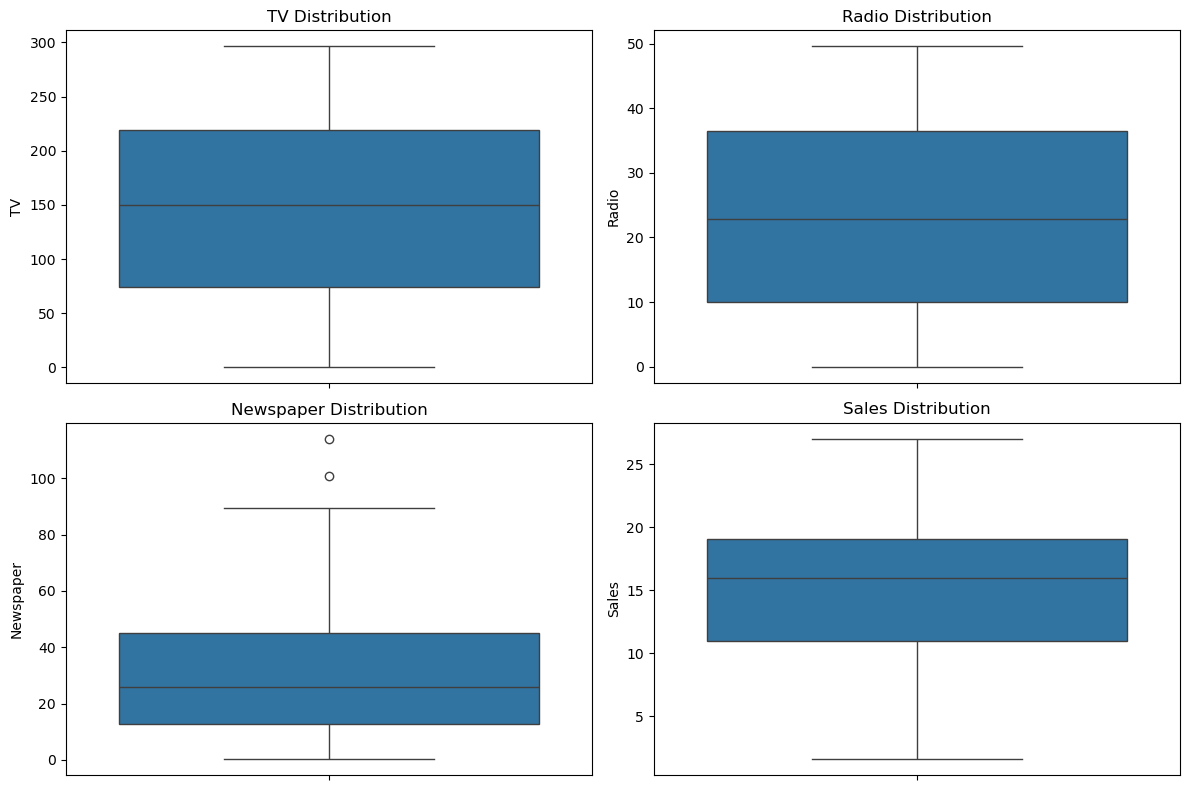

In [22]:
# Box plots for identifying outliers
plt.figure(figsize=(12, 8))

# TV
plt.subplot(2, 2, 1)
sns.boxplot(data['TV'])
plt.title('TV Distribution')

# Radio
plt.subplot(2, 2, 2)
sns.boxplot(data['Radio'])
plt.title('Radio Distribution')

# Newspaper
plt.subplot(2, 2, 3)
sns.boxplot(data['Newspaper'])
plt.title('Newspaper Distribution')

# Sales
plt.subplot(2, 2, 4)
sns.boxplot(data['Sales'])
plt.title('Sales Distribution')

plt.tight_layout()
plt.show()


 Data Preprocessing

In [25]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (if any)
# Example: Fill missing values with the mean (if any)
data = data.fillna(data.mean())


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


Feature Scaling Some machine learning models may require feature scaling (especially algorithms like linear regression or k-nearest neighbors). For example, the TV, Radio, and Newspaper columns may have different ranges, so scaling ensures they are on a comparable scale.

In [28]:
# Initialize the scaler
scaler = StandardScaler()

# Scale features
scaled_features = scaler.fit_transform(data[['TV', 'Radio', 'Newspaper']])

# Replace the original columns with the scaled ones
data[['TV', 'Radio', 'Newspaper']] = scaled_features


Splitting the Dataset Split your dataset into training and testing sets. This is essential for training the model and evaluating its performance.

In [31]:
# Split the dataset into features (X) and target variable (y)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Selection

In [34]:
#Linear Regression
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2.9077569102710923
R-squared: 0.9059011844150826


Model Tuning for Linear Regression

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the model
ridge_model = Ridge()

# Define the hyperparameters grid
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Perform GridSearchCV
ridge_grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)

# Best model and parameters
best_ridge_model = ridge_grid_search.best_estimator_
print("Best Ridge Model Alpha:", ridge_grid_search.best_params_)

# Evaluate the model
y_pred_ridge = best_ridge_model.predict(X_test)
print("Ridge Regression R-squared:", r2_score(y_test, y_pred_ridge))


Best Ridge Model Alpha: {'alpha': 0.1}
Ridge Regression R-squared: 0.9058796834807278


In [39]:
# Lasso Regression (L1 Regularization)
from sklearn.linear_model import Lasso

# Define the model
lasso_model = Lasso()

# Define the hyperparameters grid
param_grid_lasso = {'alpha': [0.1, 1, 10, 100]}

# Perform GridSearchCV
lasso_grid_search = GridSearchCV(lasso_model, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)

# Best model and parameters
best_lasso_model = lasso_grid_search.best_estimator_
print("Best Lasso Model Alpha:", lasso_grid_search.best_params_)

# Evaluate the model
y_pred_lasso = best_lasso_model.predict(X_test)
print("Lasso Regression R-squared:", r2_score(y_test, y_pred_lasso))


Best Lasso Model Alpha: {'alpha': 0.1}
Lasso Regression R-squared: 0.9053073957991898


In [43]:
#Grid Search for Random Forest
# Define the model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform GridSearchCV
rf_grid_search = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Best model and parameters
best_rf_model = rf_grid_search.best_estimator_
print("Best Random Forest Model Parameters:", rf_grid_search.best_params_)

# Evaluate the model
y_pred_rf = best_rf_model.predict(X_test)
print("Random Forest R-squared:", r2_score(y_test, y_pred_rf))


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
311 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Admin\anaconda3\Lib\site-packa

Best Random Forest Model Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest R-squared: 0.905303829798939


In [45]:
 #Random Search for Random Forest
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid
param_dist_rf = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': np.arange(10, 30, 5),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform RandomizedSearchCV
rf_random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist_rf, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
rf_random_search.fit(X_train, y_train)

# Best model and parameters
best_rf_random_model = rf_random_search.best_estimator_
print("Best Random Forest (Random Search) Model Parameters:", rf_random_search.best_params_)

# Evaluate the model
y_pred_rf_random = best_rf_random_model.predict(X_test)
print("Random Forest (Random Search) R-squared:", r2_score(y_test, y_pred_rf_random))


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Admin\anaconda3\Lib\site-packages\

Best Random Forest (Random Search) Model Parameters: {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15}
Random Forest (Random Search) R-squared: 0.9138375180946815


Evaluating the Model

In [48]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Example evaluation for Random Forest model
y_pred_final = best_rf_random_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_final)
r2 = r2_score(y_test, y_pred_final)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_final)

print(f'MSE: {mse}')
print(f'R-squared: {r2}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


MSE: 2.662515469604436
R-squared: 0.9138375180946815
RMSE: 1.6317216274856554
MAE: 1.3110356666666647


In [50]:
import joblib
# Save the best model
joblib.dump(best_rf_random_model, 'best_sales_prediction_model.pkl')


['best_sales_prediction_model.pkl']

Model Finalization and Saving

In [54]:
# Load the model for future use
best_rf_random_model = joblib.load('best_sales_prediction_model.pkl')


In [56]:
#Model Evaluation on Unseen Data
# Make predictions on test data
y_pred_new = best_rf_random_model.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred_new)
r2 = r2_score(y_test, y_pred_new)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_new)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')


Mean Squared Error (MSE): 2.662515469604436
R-squared (R²): 0.9138375180946815
Root Mean Squared Error (RMSE): 1.6317216274856554
Mean Absolute Error (MAE): 1.3110356666666647


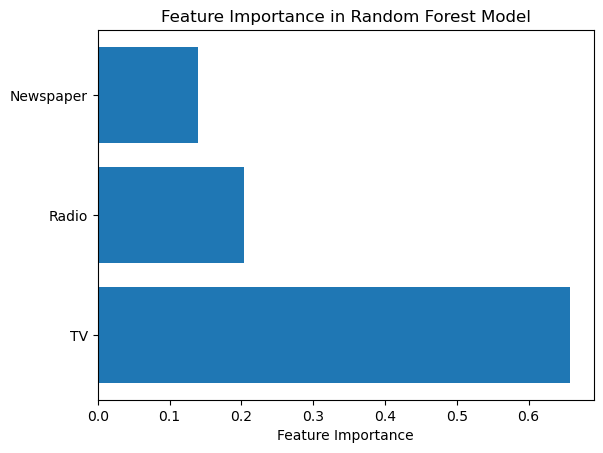

In [58]:
#Feature Importance (For Decision Trees or Random Forest)
# Plot feature importances
features = ['TV', 'Radio', 'Newspaper']  # Adjust this list based on your dataset
importances = best_rf_random_model.feature_importances_

# Plotting
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Model")
plt.show()

Model Deployment

In [61]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the trained model
model = joblib.load('best_sales_prediction_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()  # Expecting JSON input
    tv = data['TV']
    radio = data['Radio']
    newspaper = data['Newspaper']
    
    # Make prediction
    prediction = model.predict([[tv, radio, newspaper]])
    
    return jsonify({'predicted_sales': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Building a Frontend

In [64]:
import streamlit as st
import joblib

# Load the trained model
model = joblib.load('best_sales_prediction_model.pkl')

# Streamlit UI
st.title('Sales Prediction')
tv = st.number_input('TV Advertising Budget', min_value=0)
radio = st.number_input('Radio Advertising Budget', min_value=0)
newspaper = st.number_input('Newspaper Advertising Budget', min_value=0)

if st.button('Predict Sales'):
    prediction = model.predict([[tv, radio, newspaper]])
    st.write(f'Predicted Sales: {prediction[0]}')


2024-11-06 15:46:22.396 
  command:

    streamlit run C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-06 15:46:22.400 Session state does not function when running a script without `streamlit run`


In [66]:
import streamlit as st
import joblib

# Load the trained model
model = joblib.load('best_sales_prediction_model.pkl')

# Streamlit UI components
st.title('Sales Prediction Application')

# Input fields for user input
tv = st.number_input('TV Advertising Budget', min_value=0)
radio = st.number_input('Radio Advertising Budget', min_value=0)
newspaper = st.number_input('Newspaper Advertising Budget', min_value=0)

# Button to predict sales
if st.button('Predict Sales'):
    prediction = model.predict([[tv, radio, newspaper]])
    st.write(f'Predicted Sales: {prediction[0]}')


In [68]:
if tv < 0 or radio < 0 or newspaper < 0:
    st.warning('Please enter valid (positive) values for the advertising budgets.')
else:
    prediction = model.predict([[tv, radio, newspaper]])
    st.write(f'Predicted Sales: {prediction[0]}')


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [70]:
import time

with st.spinner('Making prediction...'):
    time.sleep(2)  # simulate prediction time
    prediction = model.predict([[tv, radio, newspaper]])

st.write(f'Predicted Sales: {prediction[0]}')


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [74]:
base="light"
primaryColor="#F39C12"
backgroundColor="#FFFFFF"
secondaryBackgroundColor="#F7F7F7"


In [76]:
st.markdown("<h1 style='text-align: center; color: #FF5733;'>Sales Prediction Model</h1>", unsafe_allow_html=True)


DeltaGenerator()

1. Final Thoughts
   
This is a total sales prediction project toward predicting future sales through advertisements. The utilization of machine learning algorithms and a user-friendly interface created has brought about an application that is very useful in delivering useful insights to businesses interested in refining their marketing strategy.

Now that you have finished your project, share it, deploy it, and perhaps use it as a springboard for more advanced sales prediction models in the future. Well done in building the whole pipeline from data preparation and model building all the way to frontend development and deployment!